In [20]:
from sklearn.decomposition import PCA
import numpy as np
import scipy.spatial as scisp
import pandas as pd
from matplotlib import pyplot as plt
import scipy.io as sciio

In [3]:
zip2vec = np.load("zip2vec.npy")
indices = np.load("indices.npy")
zipcodes = np.load("zipcodes.npy")


In [128]:
print(zip2vec[27571])

[0.06457774 0.07756971 0.07948029 0.04508978 0.11310657 0.0431792
 0.0661062  0.27703467 0.0638135  0.0500573  0.04585401 0.07413066]


In [82]:
zip2idx = {z : i for z, i in zip(zipcodes, indices)}
idx2zip = {i : z for i, z in zip(indices, zipcodes)}

{'06001': 0, '06002': 1, '06006': 2, '06010': 3, '06011': 4, '06013': 5, '06016': 6, '06018': 7, '06019': 8, '06020': 9, '06022': 10, '06023': 11, '06024': 12, '06026': 13, '06027': 14, '06029': 15, '06030': 16, '06031': 17, '06032': 18, '06033': 19, '06035': 20, '06037': 21, '06039': 22, '06040': 23, '06042': 24, '06043': 25, '06045': 26, '06050': 27, '06051': 28, '06052': 29, '06053': 30, '06057': 31, '06058': 32, '06061': 33, '06062': 34, '06063': 35, '06064': 36, '06065': 37, '06066': 38, '06067': 39, '06068': 40, '06069': 41, '06070': 42, '06071': 43, '06072': 44, '06073': 45, '06074': 46, '06075': 47, '06076': 48, '06078': 49, '06080': 50, '06081': 51, '06082': 52, '06083': 53, '06084': 54, '06085': 55, '06088': 56, '06089': 57, '06091': 58, '06092': 59, '06093': 60, '06095': 61, '06096': 62, '06098': 63, '06101': 64, '06103': 65, '06105': 66, '06106': 67, '06107': 68, '06108': 69, '06109': 70, '06110': 71, '06111': 72, '06112': 73, '06114': 74, '06117': 75, '06118': 76, '06119':

In [25]:
print(zip2vec.shape)
sciio.savemat('arrdata.mat', mdict={'arr': zip2vec})

(29112, 12)


In [61]:
copy = zip2vec
asum = np.sum(zip2vec,axis = 1)
print(asum.shape)
#boo = (asum == 0)
copy = copy[~(copy==0).all(1)]
print(copy.shape)
#print(np.sum(copy,axis = 1))
copy = copy/(np.sum(copy,axis = 1, keepdims = True))
print(copy)
sciio.savemat('ar.mat', mdict={'ar': copy})
#a = np.delete(a, 1, 0) delete the second row

(29112,)
(28029, 12)
[[0.08247423 0.08247423 0.07474227 ... 0.1443299  0.1443299  0.04123711]
 [0.07142857 0.10416667 0.03571429 ... 0.01190476 0.19047619 0.0922619 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.11155378 0.11155378 0.05179283 ... 0.03585657 0.15139442 0.07968127]]


In [66]:
tw = np.load("zip2tw.npy")
print(tw.shape)

(29112, 1)


In [151]:
mine = np.load("zip2vec.npy")
#print(mine)
you = mine * tw
#print(you[27571])
for i in range(0,29112):
    for j in range(0,12):
        if you[i][j] > 1:
            you[i][j] = np.log(you[i][j])
sciio.savemat('log.mat', mdict={'best': you})
sciio.savemat('large.mat', mdict={'large':you[large_city_idx]})
sciio.savemat('medium.mat', mdict={'medium':you[medium_city_idx]})
sciio.savemat('small.mat', mdict={'small':you[small_city_idx]})
sciio.savemat('tiny.mat', mdict={'tiny':you[tiny_city_idx]})
#count = 0
#su = np.sum(you,axis = 1)
#print(su.shape)
#for i in range(0,29112):
#    if su[i]>400:
#        count+=1
#print(count)
#print(you)

In [158]:
#name = "largeresult.mat"
#name = "mediumresult.mat"
#name = "smallresult.mat"
name = "tinyresult.mat"
m = sciio.loadmat(name)['r']
print(m)
#m = m[:29112]
#np.save("largeresult.npy",m)
#np.save("mediumresult.npy",m)
#np.save("smallresult.npy",m)
np.save("tinyresult.npy",m)
print(np.argmax(m[:-12],axis = 0))


[[0.00121266 0.00059527 0.00072032 ... 0.00068955 0.00150138 0.00227272]
 [0.00147597 0.00077412 0.00323079 ... 0.00085338 0.00183577 0.00271239]
 [0.00126081 0.00058722 0.00073451 ... 0.00065764 0.0015083  0.00228398]
 ...
 [0.02218696 0.0127847  0.01490404 ... 0.16066768 0.02822124 0.03777137]
 [0.05225149 0.02626301 0.03129149 ... 0.02822124 0.18235054 0.09606268]
 [0.07955664 0.03611872 0.0439096  ... 0.03777137 0.09606268 0.2672645 ]]
[ 758 4824  706   73 7865  492 7095  968 5409  670 3101 3101]


In [146]:
data = pd.read_csv("data2.csv", index_col = 0)

In [147]:
append0 = np.vectorize(lambda x : str(x) if len(str(x)) == 5 else "0" + str(x))
data["zip"] = append0(data["zip"])

In [148]:
large_city_zip = data[data["city scale"] == "large"]["zip"].unique()
medium_city_zip = data[data["city scale"] == "medium"]["zip"].unique()
small_city_zip = data[data["city scale"] == "small"]["zip"].unique()
tiny_city_zip = data[data["city scale"] == "tiny"]["zip"].unique()

In [247]:
#large_city_idx = [zip2idx[z] for z in large_city_zip]
large_city_idx = [zip2idx[z] for z in large_city_zip]
medium_city_idx = [zip2idx[z] for z in medium_city_zip]
small_city_idx = [zip2idx[z] for z in small_city_zip]
tiny_city_idx = [zip2idx[z] for z in tiny_city_zip]
print(large_city_idx)

[0, 1, 3, 8, 18, 19, 21, 23, 24, 28, 30, 34, 38, 39, 42, 46, 52, 56, 61, 67, 68, 69, 70, 71, 72, 74, 76, 77, 78, 86, 109, 121, 128, 130, 133, 136, 149, 151, 154, 156, 159, 161, 163, 164, 166, 173, 178, 181, 182, 185, 186, 189, 191, 194, 195, 196, 203, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 228, 229, 230, 233, 234, 236, 237, 239, 240, 241, 242, 243, 261, 262, 272, 276, 278, 279, 280, 282, 283, 288, 289, 290, 292, 295, 296, 297, 299, 303, 305, 310, 311, 312, 315, 320, 321, 322, 324, 326, 328, 329, 333, 338, 339, 340, 341, 342, 344, 345, 347, 349, 352, 353, 366, 373, 374, 377, 379, 383, 384, 385, 386, 389, 390, 391, 392, 393, 395, 396, 397, 398, 399, 401, 402, 404, 405, 406, 408, 409, 430, 437, 439, 444, 451, 455, 458, 459, 460, 463, 465, 466, 468, 470, 472, 474, 475, 479, 481, 485, 487, 488, 489, 493, 502, 508, 509, 512, 513, 515, 517, 518, 534, 535, 536, 537, 538, 539, 540, 541, 544, 545, 546, 549, 551, 552, 553, 557, 561, 563, 564, 565, 567, 568, 570, 572, 573, 575

In [150]:
large_cities_vec = zip2vec[large_city_idx]
medium_cities_vec = zip2vec[medium_city_idx]
small_cities_vec = zip2vec[small_city_idx]
tiny_cities_vec = zip2vec[tiny_city_idx]
print(large_cities_vec)

[[0.08247401 0.08247401 0.07474208 ... 0.14432952 0.14432952 0.04123701]
 [0.07142836 0.10416636 0.03571418 ... 0.01190473 0.19047562 0.09226163]
 [0.05868808 0.10126571 0.07710003 ... 0.04948211 0.15995379 0.14039109]
 ...
 [0.09062486 0.0671874  0.07656238 ... 0.05468741 0.09374985 0.15937475]
 [0.11395995 0.07122497 0.05982897 ... 0.05555548 0.12962944 0.13105394]
 [0.11155334 0.11155334 0.05179262 ... 0.03585643 0.15139382 0.07968096]]


In [15]:
print(zip2vec.shape)

(29112, 12)


In [11]:
pca = PCA(n_components=2)
pca.fit(large_cities_vec)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
x, y = pca.transform(zip2vec)[:, 0], pca.transform(zip2vec)[:, 1]
print(pca.transform(zip2vec).shape)

(29112, 2)


In [16]:
print(x.shape)
print(y.shape)

(29112,)
(29112,)


In [13]:
# np.argmin(x)
# np.min(x)
# x[3240] = -0.8
# np.argmin(y)
y[3240] = -1


(-0.75, 0.75)

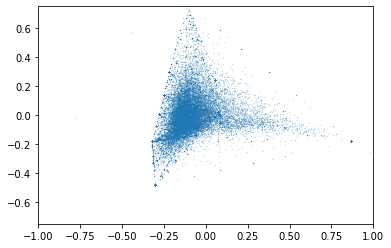

In [14]:
plt.scatter(x, y, s = 0.01)
plt.xlim(-1, 1)
plt.ylim(-0.75, 0.75)

In [35]:
# zip2vec
m = sciio.loadmat("graphprobability.mat")['r']
m = m[:29112]
print(np.argmax(m,axis = 0))


[3240 3240 3240 3240 3240 3240 3240 3240 3240 3240 3240 3240]


In [127]:
idx2zip[27571]

'78216'

In [159]:
print(large_city_idx[3883])

14070


In [160]:
print(idx2zip[14070])

49701


In [260]:
large = np.load('largesort.npy')
print(large.shape)
largename = []
for i in range(0,large.shape[0]):
    tmp = []
    for j in range(0,large.shape[1]):
        large[i][j] = idx2zip[large_city_idx[large[i][j]]]
        tmp.append(zip2name(large[i][j]))
    largename.append(tmp)
print(large)
print(largename)

(12, 3)
[[29607 78216 21401]
 [29607 78216 21401]
 [78216 29607 21401]
 [78216 94103 21401]
 [29607 78216 21401]
 [29607 78216 29577]
 [78216 29607  7652]
 [ 7652 29607 78216]
 [29607  7652 78216]
 [29607  7652 78216]
 [21401 29607 78216]
 [78216 29607 29577]]
[['South Carolina Greenville Greenville', 'Texas San Antonio Bexar', 'Maryland Annapolis Anne Arundel'], ['South Carolina Greenville Greenville', 'Texas San Antonio Bexar', 'Maryland Annapolis Anne Arundel'], ['Texas San Antonio Bexar', 'South Carolina Greenville Greenville', 'Maryland Annapolis Anne Arundel'], ['Texas San Antonio Bexar', 'California San Francisco San Francisco', 'Maryland Annapolis Anne Arundel'], ['South Carolina Greenville Greenville', 'Texas San Antonio Bexar', 'Maryland Annapolis Anne Arundel'], ['South Carolina Greenville Greenville', 'Texas San Antonio Bexar', 'South Carolina Myrtle Beach Horry'], ['Texas San Antonio Bexar', 'South Carolina Greenville Greenville', 'New Jersey Paramus Bergen'], ['New Jersey

In [261]:
medium = np.load('mediumsort.npy')
print(medium.shape)
mediumname = []
for i in range(0,medium.shape[0]):
    tmp = []
    for j in range(0,medium.shape[1]):
        medium[i][j] = idx2zip[medium_city_idx[medium[i][j]]]
        tmp.append(zip2name(medium[i][j]))
    mediumname.append(tmp)
print(medium)
print(mediumname)

(12, 3)
[[54481 85051 85086]
 [54481 85086 85051]
 [54481 85051 85053]
 [54481 85086 85051]
 [54481 85051 85086]
 [54481 85086 85051]
 [85051 85053 85086]
 [85086 85051 75032]
 [85051 54481 85086]
 [85051 54481 85053]
 [54481 85051 85086]
 [54481 85051 85086]]
[['Wisconsin Stevens Point Portage', 'Arizona Phoenix Maricopa', 'Arizona Phoenix Maricopa'], ['Wisconsin Stevens Point Portage', 'Arizona Phoenix Maricopa', 'Arizona Phoenix Maricopa'], ['Wisconsin Stevens Point Portage', 'Arizona Phoenix Maricopa', 'Arizona Phoenix Maricopa'], ['Wisconsin Stevens Point Portage', 'Arizona Phoenix Maricopa', 'Arizona Phoenix Maricopa'], ['Wisconsin Stevens Point Portage', 'Arizona Phoenix Maricopa', 'Arizona Phoenix Maricopa'], ['Wisconsin Stevens Point Portage', 'Arizona Phoenix Maricopa', 'Arizona Phoenix Maricopa'], ['Arizona Phoenix Maricopa', 'Arizona Phoenix Maricopa', 'Arizona Phoenix Maricopa'], ['Arizona Phoenix Maricopa', 'Arizona Phoenix Maricopa', 'Texas Rockwall Rockwall'], ['Arizona

In [262]:
small = np.load('smallsort.npy')
print(small.shape)
smallname = []
for i in range(0,small.shape[0]):
    tmp = []
    for j in range(0,small.shape[1]):
        small[i][j] = idx2zip[small_city_idx[small[i][j]]]
        tmp.append(zip2name(small[i][j]))
    smallname.append(tmp)
print(small)
print(smallname)

(12, 3)
[[85085 85087 83822]
 [85085 31708 30356]
 [85085 98443 20725]
 [85085 85087 33729]
 [85085 85087  5257]
 [85085 85087 71640]
 [30362 78627 40121]
 [10120 76061 90086]
 [30722 39776 34117]
 [85709 26506 46556]
 [85085 85087 46910]
 [85085 85087 42352]]
[['Arizona Phoenix Maricopa', 'Arizona New River Maricopa', 'Idaho Oldtown Bonner'], ['Arizona Phoenix Maricopa', 'Georgia Albany Dougherty', 'Georgia Atlanta DeKalb'], ['Arizona Phoenix Maricopa', 'Washington Tacoma Pierce', 'Maryland Laurel Anne Arundel'], ['Arizona Phoenix Maricopa', 'Arizona New River Maricopa', 'Florida Saint Petersburg Pinellas'], ['Arizona Phoenix Maricopa', 'Arizona New River Maricopa', 'Vermont North Bennington Bennington'], ['Arizona Phoenix Maricopa', 'Arizona New River Maricopa', 'Arkansas Eudora Chicot'], ['Georgia Atlanta DeKalb', 'Texas Georgetown Williamson', 'Kentucky Fort Knox Hardin'], ['New York New York New York', 'Texas Lillian Johnson', 'California Los Angeles Los Angeles'], ['Georgia Dalto

In [263]:
tiny = np.load('tinysort.npy')
print(tiny.shape)
tinyname = []
for i in range(0,tiny.shape[0]):
    tmp = []
    for j in range(0,tiny.shape[1]):
        tiny[i][j] = idx2zip[tiny_city_idx[tiny[i][j]]]
        tmp.append(zip2name(tiny[i][j]))
    tinyname.append(tmp)
print(tiny)
print(tinyname)

(12, 3)
[[57335 62097 64728]
 [55455 29457 90231]
 [72214 72216 75030]
 [ 6836  5494 98324]
 [24077 18703  4212]
 [36068 71009 91503]
 [28310 27715 28902]
 [85038 22103 33101]
 [65102 91371 27361]
 [40506 72035 86011]
 [60482 75047 99650]
 [60482 34436 36432]]
[['South Dakota Fairfax Gregory', 'Illinois Worden Madison', 'Missouri Bronaugh Vernon'], ['Minnesota Minneapolis Hennepin', 'South Carolina Johns Island Charleston', 'California Culver City Los Angeles'], ['Arkansas Little Rock Pulaski', 'Arkansas Little Rock Pulaski', 'Texas Rowlett Dallas'], ['Connecticut Greenwich Fairfield', 'Vermont Westford Chittenden', 'Washington Carlsborg Clallam'], ['Virginia Cloverdale Botetourt', 'Pennsylvania Wilkes Barre Luzerne', 'Maine Auburn Androscoggin'], ['Alabama Prattville Autauga', 'Louisiana Blanchard Caddo', 'California Burbank Los Angeles'], ['North Carolina Fort Bragg Cumberland', 'North Carolina Durham Durham', 'North Carolina Brasstown Clay'], ['Arizona Phoenix Maricopa', 'Virginia W

In [230]:
zipdata = pd.read_csv("uszips.csv",encoding = 'ISO-8859-1')
def zip2name(k): 
    for i in range(0,41702):
        if int(zipdata.iloc[i]['zip']) == k:
            return zipdata.iloc[i]['state_name'] + " "+ zipdata.iloc[i]['city'] + " "+ zipdata.iloc[i]['county_name']
    return "error"
   

In [241]:
#print(zipdata.iloc[4][''])
#print(zipdata)
zip2name(8247)


'New Jersey Stone Harbor Cape May'

In [264]:
allm = np.load('allsort.npy')
print(allm.shape)
allmname = []
for i in range(0,allm.shape[0]):
    tmp = []
    for j in range(0,allm.shape[1]):
        allm[i][j] = idx2zip[allm[i][j]]
        tmp.append(zip2name(allm[i][j]))
    allmname.append(tmp)
print(allm)
print(allmname)

(12, 3)
[[29607 78216 21401]
 [29607 78216 21401]
 [78216 29607 21401]
 [78216 94103 92626]
 [29607 78216 21401]
 [29607 78216 29577]
 [78216 29607  7652]
 [ 7652 21401 29607]
 [29607  7652 78216]
 [29607  7652 78216]
 [21401 29607 78216]
 [78216 29607 21401]]
[['South Carolina Greenville Greenville', 'Texas San Antonio Bexar', 'Maryland Annapolis Anne Arundel'], ['South Carolina Greenville Greenville', 'Texas San Antonio Bexar', 'Maryland Annapolis Anne Arundel'], ['Texas San Antonio Bexar', 'South Carolina Greenville Greenville', 'Maryland Annapolis Anne Arundel'], ['Texas San Antonio Bexar', 'California San Francisco San Francisco', 'California Costa Mesa Orange'], ['South Carolina Greenville Greenville', 'Texas San Antonio Bexar', 'Maryland Annapolis Anne Arundel'], ['South Carolina Greenville Greenville', 'Texas San Antonio Bexar', 'South Carolina Myrtle Beach Horry'], ['Texas San Antonio Bexar', 'South Carolina Greenville Greenville', 'New Jersey Paramus Bergen'], ['New Jersey Pa

In [259]:
#akk = np.load('validation.npy')
m = sciio.loadmat("validation2.mat")['r']
print(m.shape)
np.save('final.npy',m)
#m = m[:29112]
#print(np.argmax(m,axis = 0))
#print(idx2zip[24468])

(29124, 12)
